### Research Question: 
- How has R&B/Hip-Hop evolved from the 1990s - 2018?
- What are the major changes that have occured?
- Can the gender of the artist be predicted from the lyrics? (the assumption here is that the gender of the lyrics belongs to the owner of the song /artist )
- check the differences in the popular artists
- check the difference in overall sentiments

### Data Collection
For this project, names of songs and artists are scraped from Billboard's Hot R&B/Hip-Hop Songs. These details are used to obtain the lyrics of these songs using the Genuis Lyric API and stored to a JSON file. The python script used to obtain the data can be is scraper.py

### Data Preprocessing
As expected, the data is messy as it is hence the need for preprocessing. Regular expressions are employed in cleaning the data as shown. The patterns to be captured are developed after inspecting the data.

In [302]:
import re
import nltk
import ftfy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

%matplotlib inline

pd.options.display.max_rows = 420

In [348]:
df = pd.read_json("billboard_top_songs_lyrics.json")
df = df.drop_duplicates(keep='first')  #remove duplicates and keep the first occurence
df.loc[df.lyrics.isnull()]

data = df.copy()
data

,artist,lyrics,song,year
0,Michael Jackson,"[Verse 1]\nGirl, close your eyes\nLet that rhy...",Rock With You,1980
1,Shalamar,[Intro]\nWhoa whoa whoa (yeah)\nWhoa whoa whoa...,The Second Time Around,1980
2,"Ray, Goodman & Brown","You must be a special lady\n(Billy, you singin...",Special Lady,1980
3,The Whispers,And the beat goes on\nJust like my love everla...,And The Beat Goes On,1980
4,The Brothers Johnson,Steppin' out the weekends open wide\nFill it u...,Stomp,1980
5,The Isley Brothers,HgsCa\n\nDubbelquatrin om tennis\n\n---\n\nZen...,Don't Say Goodnight (It's Time For Love) (Part...,1980
6,Jermaine Jackson,"Close my eyes, and I see your face at night\nT...",Let's Get Serious,1980
7,The S.O.S. Band,Let's do it\nLet's do it\nLet's do it\nLet's d...,Take Your Time (Do It Right),1980
8,Larry Graham,Love had played its games on me so long\nI sta...,One In A Million You,1980
9,Diana Ross,"[Intro]\nI said, ""Upside down, you're turning ...",Upside Down,1980


In [310]:
# #re-visit
# data = df.copy()
# data.loc[386, 'lyrics'] = " i dont fuck with you you little stupid ass bitch i aint fuckin with you you little you little dumb ass bitch i aint fuckin with you i got a million trillion things id rather fuckin do than to be fuckin with you little stupid ass i dont give a fuck i dont give a fuck i dont i dont i dont give a fuck bitch i dont give a fuck about you or anything that you do dont give a fuck about you or anything that you doi heard you got a new man i see you takin a pic then you post it up thinkin that its makin me sick brr brr i see you calling i be makin it quick imma answer that shit like i dont fuck with you bitch i got no feelings to go i swear i had it up to here i got no ceilings to go i mean for real fuck how you feel fuck your two cents if it aint goin towards the bill yeah and everyday i wake up celebratin shit why cause i just dodged a bullet from a crazy bitch i stuck to my guns thats what made me rich thats what put me on thats what got me here thats what made me this and everything that i do is my first name these hoes chase bread aw damn she got a bird brain aint nothin but trill in me aw man silly me i just bought a crib three stories that bitch a trilogy and you know im rollin weed thats fuckin up the ozone i got a bitch that text me she aint got no clothes on and then another one text then your ass next and im gonna text your ass back likei dont fuck with you you little stupid ass bitch i aint fuckin with you you little you little dumb ass bitch i aint fuckin with you i got a million trillion things id rather fuckin do than to be fuckin with you little stupid ass i dont give a fuck i dont give a fuck i dont i dont i dont give a fuck bitch i dont give a fuck about you or anything that you do dont give a fuck about you or anything that you do i dont give a fuck i dont give a fuck i dont i dont i dont give a fuck bitch i dont give a fuck about you or anything that you do dont give a fuck about you or anything that you dogot a million things on my mind executive deals online limited amount of time chasin these dollar signs and you aint on your grind you might be able to find me up in the mgm casino in the d fuckin off fetti i coulda put on property from the bay to the murder mitten my niggas put murder missions she choose him thats her decision free my niggas in prison on the phone with a bitch who cant do shit for a pimp but make a nigga hella rich got a blunt in my dental goin ham in a rental on my way to sacramento late night arsenio im never sentimental go hard or go home listen barely harley im chromeless you might end up domeless i bet you she into me her cheddar she givin me i make a bitch stand outside forever like the statue of liberty rest in pimp pimp c underground king of the south i raise my styrofoam up and pour some drank in my mouth why you always coming around with bad news say you want me to win but hope i lose ass never rock with other niggas in the crew but them niggas cool its just thatbitch i aint fuck with you you little stupid ass bitch i aint fuckin with you you little you little dumb ass bitch i aint fuckin with you i got a million trillion things id rather fuckin do than to be fuckin with you little stupid ass i dont give a fuck i dont give a fuck i dont i dont i dont give a fuck bitch i dont give a fuck about you or anything that you do dont give a fuck about you or anything that you do i dont give a fuck i dont give a fuck i dont i dont i dont give a fuck bitch i dont give a fuck about you or anything that you do dont give a fuck about you or anything that you doi got a new chick that i gotta thank god for i got a new whip that i gotta thank a lot for yeah i got a lot but want a lot more yeah we in the buildin but im tryna take it to the top floor i swear i hear some new bullshit every day im wakin up it seems like nowadays everybody breakin up that shit can break you down if you lose a good girl i guess you need a bad bitch to come around and make it up i guess drama makes for the best content everything got a bad side even a conscience now youre drinkin til your unconscious feel me when you get a fine bitch just dont forget to read the fine print life got me meditatin like im in the himalayas keep it g with the l lit on me like the elevator yeah i know that karmas too real so i hope you doin cool but still stupid ass bitch i aint fuckin with you little stupid ass i aint fuckin with i aint fuckin i aint i aint fuckin with you i aint fuckin with you "
# data.loc[376, 'lyrics'] = " intro beyoncéive been drinking ive been drinking i get filthy when that liquor get into me ive been thinking ive been thinking why cant i keep my fingers off you baby i want you na na why cant i keep my fingers off you baby i want you na naverse 1 beyoncé cigars on ice cigars on ice feeling like an animal with these cameras all in my grill flashing lights flashing lights you got me faded faded faded baby i want you na na cant keep your eyes off my fatty daddy i want you na na drunk in love i want youbridge beyoncé we woke up in the kitchen saying how the hell did this shit happen oh baby drunk in love we be all night last thing i remember is our beautiful bodies grinding off in that club drunk in lovehook beyoncé we be all night love love we be all night love loveverse 2 beyoncé we be all night and everything alright no complaints for my body so fluorescent under these lights boy im drinking walking in my lassemblage im rubbing on it rubrubbing if you scared call that reverend boy im drinking imma bring it right oñly bring you a gangster wife louis sheets  he sweat it out like washed rags he wet it up boy im drinking im singing on the mic to my boys toys then i fill the tub up halfway then ride it with my surfboard surfboard surfboard graining on that wood graining graining on that wood im swerving on that swerving swerving on that big body been serving all this swerve surfing all of this good goodbridge we woke up in the kitchen saying how the hell did this shit happen oh baby drunk in love we be all night last thing i remember is our beautiful bodies grinding off in that club drunk in lovehook we be all night love love we be all night love loveverse 3 jay z hold up hold up i do say its the shit if i do say so myself if i do say so myself if i do say so myself hold up stumble all in the house tryna backup all of that mouth that you had all in the car talking bout you the baddest bitch thus far talking bout you be repping that 3rd wanna see all that shit that i heard know i sling clint eastwood hope you can handle this curve uh foreplay in a foyer fucked up my warhol slid the panties right to the side aint got the time to take drawers off on sight catch a charge i might beat the box up like mike in 97 i bite im ike turner turn up baby know i dont play now eat the cake anna mae said eat the cake anna mae im nice for yall to reach these heights you gon need g3 4 5 6 flights sleep tight we sex again in the morning your breasteses is my breakfast we going in we be all nighthook beyoncé we be all night love love we be all night love loveverse 4 beyoncé never tired never tired i been sippin thats the only thing thats keeping me on fire me on fire didnt mean to spill that liquor all on my attire ive been drinking watermelon i want your body right here daddy i want you right now cant keep your eyes off my fatty daddy i want youhook beyoncé we be all night love love we be all night love love "
# data.loc[371, 'lyrics'] = " intro ay ay ay good to see you come on in lets go yeah lets go alright alright ok uh alright ok alright okreturn of the mack get it what it is what it does what it is what it isnt looking for a better way to get up out of bed instead of getting on the internet and checking a new hippy get up thrift shop pimp strut walking little bit of humble little bit of cautious somewhere between like rocky and cosby sweater gang nope nope yall cant copy yup bad moon walking this here is our party my posses been on broadway and we did it our way grown music i shed my skin and put my bones into everything i record to it and yet im on let that stage light go and shine on down got that bob barker suit game and plinko in my style money stay on my craft and stick around for those pounds but i do that to pass the torch and put on for my town trust me on my independent shit hustlin chasing dreams since i was 14 with the four track bussing halfway cross that city with the backpack fat cat crushinglabels out here now they cant tell me nothing we give that to the people spread it across the country labels out here now they cant tell me nothing we give it to the people spread it across the countryhere we go back this is the moment tonight is the night well fight till its over so we put our hands up like the ceiling cant hold us like the ceiling cant hold us here we go back this is the moment tonight is the night well fight till its over so we put our hands up like the ceiling cant hold us like the ceiling cant hold usnow can i kick it thank you yeah im so damn grateful i grew up really wanted gold fronts but thats what you get when wu tang raised you yall cant stop me go hard like i got an 808 in my heart beat and im eating at the beat like you gave a little speed to a great white shark on shark week raw tell me go up gone deuces goodbye i got a world to see and my girl she wanna see rome caesar make you a believer now i never ever did it for a throne that validation comes from giving it back to the people now sing a song and it goes like raise those hands this is our party we came here to live life like nobody was watching i got my city right behind me if i fall they got me learn from that failure gain humility and then we keep marching ourselveshere we go back this is the moment tonight is the night well fight till its over so we put our hands up like the ceiling cant hold us like the ceiling cant hold us here we go back this is the moment tonight is the night well fight till its over so we put our hands up like the ceiling cant hold us like the ceiling cant hold us and so we put our hands up and so we put our hands uplets gona na na na na na na na aha hey and all my people sayna na na na na na na na thats right feels good hey and all my people sayna na na na na na na na its alright oh oh oh oh oh oh oh oh and all my people sayna na na na na na na na macklemorehere we go back this is the moment tonight is the night well fight till its over so we put our hands up like the ceiling cant hold us like the ceiling cant hold us here we go back this is the moment tonight is the night well fight till its over so we put our hands up like the ceiling cant hold us like the ceiling cant hold us "
# data.loc[360, 'lyrics'] = " im the fin man you dont get it do ya type of money everybody acting like they knew ya go uptown new york city b some spanish girls love me like im aventura tell uncle luke im out in miami too clubbing hard fin women aint much to do wrist bling got a condo up in biscayne still getting brain from a thang aint s changed how you feel how you feel how you feel twenty five sittin on twentyfive mil uh im in the building and im feeling myself rest in peace mac dre imma do it for the bay okay getting paid well holla wen ever that stop my team good we dont really need a mascot tell tune light one pa it like a relay ymcmb you ns more ymca me freddie marley marl at the cribbo shout goes out to niko j and chubbs shout to gibbo we got santa margarita by the liter she know even if im fin with her i dont really need her ahhh thats how you feel man thats really how you feel cause the pimpin ice cold all these bes wanna chill i mean maybe she wont then again maybe she will i can almost guarantee she know the deal real n wassapnow she want a photo ya you already know though you only live once thats the motto n yolo we bout it every day every day every day like we sittin on the bench n we dont really play every day every day f what anybody say cant see em cause the money in the way real n wassupone time f one time im calling ns out like the umpire seven grams in the blunt almost drowned in her p so i swam to her butt its eastside we in this b wish a n would like a tree in this b and if a leaf fall put some weed in that b thats my mo add a b to that s im fed up torn down im twisted door knob talk stupid off with your head n money talks and mr ed ya im so young money got a drum on the gun energizer bunny funny how honey aint sweet like sugar aint s sweet ns on the street like hookers i tongue kiss her other tongue skeet skeet skeet water gun oh my god becky look at her butttunechinow she want a photo ya you already know though you only live once thats the motto n yolo we bout it every day every day every day like we sittin on the bench n we dont really play every day every day f what anybody say cant see em cause the money in the way real n wassupwassap wassap real n wassup real n wassupnow she want a photo ya you already know though you only live once thats the motto n yolo we bout it every day every day every day like we sittin on the bench n we dont really play every day every day f what anybody say cant see em cause the money in the way real n wassupwassap wassap "
# data.loc[295, 'lyrics'] = " whats happenin dis ya boy lil jon bme clik whats up 40 whats happenin whats up sean paul whats happenin hey now ladies and gentlemen its about dat time to turn this thang on out now let me see everybody do this hey lets gosnap ya fingers do ya step you can do it all by yo self let me see you do it ay let me see you do it aysnap ya fingers do ya step you can do it all by yo self let me see you do it ay let me see you do it aysnap ya fingers and then rock wit it do it do it do it do it gon drop wit it do a step wit it put ya hips wit it all my ladies let me see ya put a twist wit it you cant do like me im by myself i do it so good i dont need nobody else whats happenin whats up got da purk fired up whats happenin whats up got patron in my cup i pop i drank im on patron and purk i cant thank im blowed to tha do dont know how tha hell im gettin homesnap ya fingers do ya step you can do it all by yo self let me see you do it ay let me see you do it aysnap ya fingers do ya step you can do it all by yo self let me see you do it ay let me see you do it aystraight from da bay posted in tha a bout to hit tha club we been mobbin all day drinkin some rusty dyinoff patron vip status strapped wit my chrome look around tha club what do i see everybody rockin from side to side to tha beat snappin they fingers bouncin to tha groove all by they self thats tha new move nigga where im from we like to go dumb im soakin up tha game im seein how its done i ask shawty what they call it she said tha pool palace straight from bank head i said you good at it do what cha do you and ya crew they even got playas and thugs doin it too the mo that i drank tha more its lookin smooth its nothin to a boss i can do tha shit toosnap ya fingers do ya step you can do it all by yo self let me see you do it ay let me see you do it aysnap ya fingers do ya step you can do it all by yo self let me see you do it ay let me see you do it aychillin in tha bip yeah we get crunk niggas poppin bottles and these bitches gettin drunk rollin up tha kush put it in tha air im throwin up tha es to let em know we in here brand new shoes brand new tool pull out tha ol school cause im feelin real cool yeah im from tha a so im leanin and rockin snappin my fingers then reachin for my glock bitch reppin my block bitch straight from tha deck when you snap ya fingers shawty gotta jerk ya neck smokin on tha best we dont fuck wit dat mess i bet you cant do it do it do it like this yeah im back to tha track back to tha snap one two step then you gotta lean back dis is how we do it in tha a town and if you aint know this how it goes downsnap ya fingers do ya step you can do it all by yo self let me see you do it ay let me see you do it aysnap ya fingers do ya step you can do it all by yo self let me see you do it ay let me see you do it ay hey hey "
# data.loc[242, 'lyrics'] = " cmon cmon yeah cmon yeah uh oooh uh oh oh ohif the partys where your at just let me knowdont be trippin when you see us in the club just show a little love represent your side like me cause round here if you slick you pick a hot one ride shotgun couple of em got one belvedere in the rear of the club pulled up on dubs and we bout to go and buy the bar up so so for sure we aint playin hang with no lames hit the park and sayinay where the party at girls is on the way where the bacardi at models and models talkin all a that know i cant forget about my thugs where the party at and all my girls where the party at off in the club where the party at if the partys where youre at let me hear you say uh oooh uh oh oh oh if the partys where youre at just let me knowall the girls in the club in they best outfits just showin that skin tryna make a nigga wanna spit where you been girl you and your friend need to come to the back where we got it locked down in your white tshirt or a threepiece suit dont matter what you wear all that matters is who you with some jiggy and some are straight grindin all up in the club just to have a good timeay where the party at girls is on the way where the bacardi at models and models talkin all a that know i cant forget about my thugs where the party at and all my girls where the party at off in the club where the party at if the partys where youre at let me hear you say uh oooh uh oh oh ohif the partys where youre at just let me know you got to show me where that party at dirty somewhere where its crackin right around onethirty never get done too early come in as is doorags and tims im rollin past his his little jag and benz with the rolls not the one with the stem the one with the rims the one that seem to make more enemies than friends im slidin in past doors both eyes closed both arms rose both charms froze with the so so  de dot f im buyin bottles bottles until it aint none left im quick to go left i blaze with no rep i jams more than def baby show me the club im like hey where the bacardi at come and mix it with the cris baby whats wrong with that we in the v i p twisted down right spliffed it two way and ooh they makin it like you missed itay where the party at girls is on the way where the bacardi at models and models talkin all a that know i cant forget about my thugs where the party at and all my girls where the party at off in the club where the party at if the partys where youre at let me hear you say uh oooh uh oh oh oh if the partys where youre at let me hear you say uh oooh uh oh oh oh if the partys where youre at just let me knowleft side just put your hands up throw em up right side just put your hands up throw em up everybody put your hands up throw em up when the beat come back around erybody do it againdo the eastside run this mutha for ya hell yeah do my southside run this mutha oh ya hell yeah and them haters aint hittin on aint talkin bout us and they look like if the partys where youre at let me hear you say "
# data.loc[161, 'lyrics'] = " last night you were so into it you told me secrets that youve never told a soul you were so nervous and yet oh so comfortable as we explored your image of lovei drank your wine as you taste mine i kissed your lips you felt my mind slip into your soul i almost cried cause it was so beautifullast night i was inside of you last night while making love to you i saw the sun the moon the mountains and the rivers i saw heaven when i made sweet love to youlast night there was no planning it it was so special and so very innocent we talked of memories our favorite fantasies as we explored our visions of lovedeep in the night right by the fireside you felt my candlelight in your soul you felt incredible i started to explode i almost cried cause it was so beautifullast night i was inside of you last night while making love to you i saw the sun the moon the mountains and the rivers i saw heaven when i made sweet love to yousunlight red red roses the scent of you it calms the heart the sight of you i fall apartmoonlight the things we notice when were in love thats when it comes and im so im so in lovelast night i was inside of you last night while making love to you i saw the sun the moon the mountains and the rivers i saw heaven when i made sweet love to you babylast night i was inside of you last night while making love to you i saw the sun the moon the mountains and the rivers i saw heaven when i made sweet love to you babylast night i was inside of you last night while making love to you i saw the sun the moon the mountains and the rivers i saw heaven when i made sweet love to you "
# data.loc[148, 'lyrics'] = " baby baby baby baby help me out here cmonwhile all the time that i was loving you you were busy loving yourself i would stop breathing if you told me to now youre busy loving someone elseeleven years out of my life besides the kids i have nothing to show wasted my years a fool of a wife i shoulda have left your ass a long time agowell im not gon cry im not gon cry im not gon shed no tears no im not gon cry its not the time cuz youre not worth my tearswell im not gon cry im not gon cry im not gon shed no tears no im not gon cry its not the time cuz youre not worth my tearsi was your lover and your secretary working every day of the week was at the job when no one else was there helping you get on your feeteleven years of sacrifice and you can leave me at the drop of a dime swallowed my fears stood by your side i shoulda left your ass a thousand timeswell im not gon cry im not gon cry im not gon shed no tears no im not gon cry its not the time cuz youre not worth my tearswell im not gon cry im not gon cry im not gon shed no tears no im not gon cry its not the time cuz youre not worth my tearsi know there are no guarantees see in love you take your chances but somehow it seems fucked up to me just look at the circumstancesthrough sickness and health till death do us part those were the words that we said from our heartsso now when you say that youre leaving me i dont get that part hell noi was your lover and your secretary working every day of the week was at the job when no one else was there helping him get on his feeteleven years of sacrifice and he can leave me at the drop of a dime swallowed my fears stood by your side i shoulda left your ass a thousand timeswell im not gon cry im not gon cry im not gon shed no tears no im not gon cry its not the time cuz youre not worth my tearswell im not gon cry im not gon cry im not gon shed no tears no im not gon cry its not the time cuz youre not worth my tearswell im not gon cry im not gon cry im not gon shed no tears no im not gon cry its not the time cuz youre not worth my tearswell im not gon cry im not gon cry im not gon shed no tears no im not gon cry its not the time cuz youre not worth my tearsi said he was never ever ever ever ever ever ever ever worth any of these tears he wasnt worth it was he worth it ladies hell no you know what we aint gonna miss him fuck it but guess what "
# data.loc[146, 'lyrics'] = " everyone falls in love sometimes sometimes its wrong and sometimes its right for every win someone must fail but there comes a point when when we exhale yeah yeah sayshoop shoop shoop shoop be doop shoop shoop shoop be doop shoop shoop shoop be doop all you gotta do is say shoop shoop shoop be doop shoop shoop shoop be doop shoop shoop shoop be doop shoop shoop shoop be doopsometimes youll laugh sometimes youll cry life never tells us the whens or whys when youve got friends to wish you well youll find your point when you will exhale yeah yeah sayshoop shoop shoop shoop be doop shoop shoop shoop be doop shoop shoop shoop be doop shoop shoop shoop be doop shoop shoop shoop be doop shoop shoop shoop be doop shoop shoop shoop be doophearts are often broken when there are words unspoken in your soul theres answers to your prayers if youre searching for a place you know a familiar face somewhere to go you should look inside yourself youre halfway theresometimes youll laugh sometimes youll cry life never tells us the whens or whys but when youve got friends to wish you well youll find your point when you will exhale yeah yeah sayshoop shoop shoop shoop be doop shoop shoop shoop be doop shoop shoop shoop be doop shoop shoop shoop be doop shoop shoop shoop be doop shoop shoop shoop be doop shoop shoop shoop be doop "
# data.loc[119, 'lyrics'] = " lately there seems to be some insecurities about the way i feel where i wanna be boy you know its with you no one can do the things you do to menever to be mistaking long as its love were making therell be no hesitating you and me and it always will be and i wont leave your side cause you knowlove will be right here be right here right here be right here no fear have no fear no tears love is heretrue love some dont believe in thats just what im giving im gonna keep it strong ill be holding on to you no one can do me like you do its truesure as the sun is shining our love will keep on climbing theres gonna be some rain gonna be some pain but as long as i know boy time will show our love will grow and i knowlove will be right here be right here right here be right here no fear have no fear no tears love is herelove will be right here be right here right here be right here no fear have no fear no tears love is herewont let go you should know this thing is real no questions just listen to you heart and love will be rightbaby whats the problem its seems like were having trouble you dont seem to understand the life i lead aint doublemy heart belongs to you and only you and you know its true a phony imitation just wont do relax your mindim not the kind who runs around and wastes time other fine brothers just dont compare ill be there i swear far or near have no fear i dont care you can count on me im right hereright here be right here right here be right here no fear have no fear no tears love is hereright here be right here right here be right here no fear have no fear no tears love is hereright here be right here right here be right here no fear have no fear no tears love is hereright here be right here right here be right here no fear have no fear "
# data.loc[93, 'lyrics'] = " boy when you look at me boy do you judge me by my cover ya got to be kiddin me to think that im that kind of loveri dont mean to disagree sorry you cant buy my kisses open your heart and see true love comes for freeim keepin my heart open hopin you wont stab me in it cause ive been in love before and when i had to pay i didntill lose my sanity tryin to measure your intentions what do you want from me how much will it beno more than youre willing to give cause you wont pay nothin for this good lovin its for freeand i wont make you promises ill just do all that i can to be your lover cause i understandthe best things in life are free now that ive discovered what you mean to me the best things in life are free now that weve got each other the best things in life are freei know you are my baby my one and only baby you said it twice ill say it thrice my baby baby babyi got so much love for you and its easy to give it when i know you feel the same way toothats all i expect from you just do all that you can to be my lover cause i understand i dothe best things in life are free now that ive discovered what you mean to me the best things in life are free now that weve got each other the best things in life are freeno more than youre willing to give cause you wont pay nothin for this good lovin its for freeand i wont make you promises you see im gonna be m gonna be were gonna be im gonna be the very best i can to be your lover cause i understandthe best things in life are free now that ive discovered what you mean to me the best things in life are free now that weve got each other the best things in life are free "
# data.loc[82, 'lyrics'] = " this will be the day that you will hear me say that i will never run awayi am here for you love is meant for two now tell me what youre gonna doif i gave you diamonds and pearls would you be a happy boy or a girl if i could i would give you the world but all i can do is just offer you my lovewhich one of us is right if we always fight why cant we just let love decide let love decideam i the weaker man because i understand that love must be the master plan love is the master planif i gave you diamonds and pearls would you be a happy boy or a girl if i could i would give you the world all i can do is just offer you my loved to the i to the a to the m o to the n to the d to the pearls of love d to the i to the a to the m to the m o to the n to the d to the pearls of lovethere will come a time there will come a time when love will blow your mind blow your mind and everything youll look for youll find take a look insidethat will be the time that will be the time that everything will shine forever so bright it makes you colorblind you will be color blindif i gave you diamonds and pearls would you be a happy boy or a girl if i could i would give you the world all i can do is just offer you my loveif i gave you diamonds and pearls pearls would you be a happy boy or a girl yeah yeah if i could i would give you the world give you the world all i can do is just offer you my love all i can doif i gave you diamonds and pearls diamonds would you be would you would you would ya would ya would ya be happy little baby if i could i would give you the world "
# data.loc[53, 'lyrics'] = " come inside take off your coat ill make you feel at home now lets pour a glass of wine cause now were all alone ive been waiting for you girl just let me hold you close to me cause ive been dying for you girl to make love to megirl you make me feel real good we can do it til we both wake up girl you know im hooked on you and this is what ill doi wanna sex you all night you make me feel good i wanna rub you down i wanna sex you uplet me take off all your clothes disconnect the phone so nobody knows let me light a candle so we can make it better makin love until we drowngirl you know it feels real good we can do it til we both wake up girl you know im hooked on you and this is what ill doi wanna sex you up makin love until we drown i wanna sex you upall i wanna do is i wanna sex you up all night girl you make me feel good i wanna rub you down i wanna sex you upmake sweet lovin all night long i wanna sex you up feels so right it cant be wrong dont be shy girl rescue me i wanna sex you up open up your heart and ill set you free "

In [311]:
#re-visit
data = data.dropna(subset=['lyrics'], axis=0)
data = data.reset_index(drop=True)

In [312]:
print(len(data.artist.unique())) #there are 260 unique artists

348


In [313]:
sections_re = re.compile(r"(\[)?\[(.*?)\](\])?") #anything in square bracket
par_re = re.compile(r"\((.*?)\)") #anything in parentheses
verse_re = re.compile(r"([0-9a-z ]+)?verse(:)?[\s](\w.)?") #verse headers
repeat_re = re.compile(r"(\n)?repeat[a-z .\(\)\d]+") #repeat headers
chorus_re = re.compile(r"chorus([a-z .\(\)\d:]+)?") #chorus headers
hook_re = re.compile(r"(\n)?hook[:| |\n]([a-z .\(\)\d]+)?") #hook headers
title_re = re.compile(r"(\n)?title:([\w+ ]+)?") #title headers
singer_re = re.compile(r"([a-z &]+)?\w+:") #name of singer indicating who is singing currently especially for featured artists 
punt_re = re.compile(r"[^a-zA-Z'&\n ]+") #irrelevant puctuations


# all_words = re.sub(r'[\(\[].*?[\)\]]', '', all_words) ---- check this out

tokenise_re = re.compile(r"(\[[^\]]+\]|[-'\w]+|[^\s\w\[']+)") #([]|words|other non-space)

def preprocess(text):
    text = text.lower()
    p_text = sections_re.sub("", text)
    p_text = par_re.sub("", p_text)
    p_text = verse_re.sub("", p_text)
    p_text = repeat_re.sub("", p_text)
    p_text = chorus_re.sub("", p_text)
    p_text = hook_re.sub("", p_text)
    p_text = title_re.sub("", p_text)
    p_text = singer_re.sub("", p_text)
    p_text = punt_re.sub("", p_text)
    p_text = ftfy.fix_text(p_text)
    return p_text.lower()  #return lyrics in the same case

def replace_apostrophe(lyrics):
    full_text = ""
    for text_line in lyrics.split("\n"):
        for text in text_line.split(" "):
            if "'" in text:
                shortened = text.split("'")
                if shortened[1] == "ll":
                    text = shortened[0] + " will"
                elif shortened[1] == "m":
                    text = shortened[0] + " am"
                elif shortened[1] == "ve":
                    text = shortened[0] + " have"
                elif shortened[1] == "re":
                    text = shortened[0] + " are"
                elif shortened[1] == "cause":
                    text = "because"
                elif shortened[1] == "":
                    text = shortened[0] + "g"
                elif text == "y'all":
                    text = "you all"
                elif text == "'em":
                    text = "them"
                elif text == "'lone":
                    text = "alone"
                elif text == "c'mon":
                    text = "common"
                elif shortened[1] == "t" and shortened != "ain":
                    text = shortened[0] + " not"
        full_text = full_text + " " + text
    return full_text
            
     
def tokenise(text):
    return tokenise_re.findall(text)

nltk.download('stopwords')
nltk_stopwords = set(stopwords.words('english'))

def stopwords_file(file):
    with open(file) as f:
        items = []
        lines = f.readlines()
        for line in lines:
            items.append(line.strip())
    return items

stanford_stopwords = stopwords_file("stanford_stopwords.txt")

def remove_stopwords(tokens):
    nltk_filtered = [word for word in tokens if word not in nltk_stopwords]
#     filtered = [word for word in nltk_filtered if word not in stanford_stopwords]
    return nltk_filtered

def frequency_analysis(tokens):
    freq = nltk.FreqDist(tokens)
    for key,val in freq.most_common(20):
        print(key,val,sep="\t")
    freq.plot(20, cumulative=False)
    
def ngrams(tokens, n, sep = "_", buffer="^"):
        buffered = [buffer] * (n-1) + tokens + [buffer] * (n-1) 
        return [sep.join(buffered[i:i+n]) for i in range(len(buffered)-n+1)]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oyinlola/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Create an object for each song

In [314]:
class Song:
    def __init__(self, obj={}):
        self.song = obj.song
        self.artist = obj.artist
        self.lyrics = obj.lyrics
        self.year = obj.year
    
    def tokenize(self):
        token = []
        for line in self.lyrics.split("\n"):
            tk = tokenise(line)
            token.extend(tk)
        self.token = token
        self.num_words = len(token)
        self.bigrams = ngrams(token, 2)
        self.trigrams = ngrams(token, 3)
        self.token_fql = Counter(token)
        return self.token
    
#try lemmatizing words and seeing the differences

In [315]:
music_library = []
all_tokens = []
tokens_1990s = []
tokens_2000s = []

In [316]:
#populate tokens
for index, row in data.iterrows():
    single = Song(row)
    single.lyrics = preprocess(single.lyrics)
    single.lyrics = replace_apostrophe(single.lyrics)
    
    music_library.append(single)
    token = single.tokenize()
    all_tokens.extend(token)
    if single.year < 2000:
        tokens_1990s.extend(token)
    elif single.year > 1999:
        tokens_2000s.extend(token)

In [317]:
filter_1990s_token = remove_stopwords(tokens_1990s)
filter_2000s_token = remove_stopwords(tokens_2000s)

filter_1990s_token_fql = Counter(filter_1990s_token)
filter_2000s_token_fql = Counter(filter_2000s_token)

filter_1990s_token_fql.most_common()
# len(filter_1990s_token)

[('baby', 743),
 ('love', 578),
 ('yeah', 395),
 ('time', 302),
 ('girl', 248),
 ('know', 239),
 ('right', 221),
 ('night', 182),
 ('go', 160),
 ('tonight', 160),
 ('oh', 147),
 ('day', 145),
 ('mind', 134),
 ('way', 133),
 ('alone', 124),
 ('heart', 123),
 ('life', 120),
 ('man', 117),
 ('one', 117),
 ('away', 111),
 ('say', 108),
 ('mine', 107),
 ('back', 105),
 ('ooh', 99),
 ('feel', 95),
 ('boy', 91),
 ('shit', 90),
 ('babe', 88),
 ('see', 84),
 ('lover', 84),
 ('good', 83),
 ('said', 83),
 ('alright', 82),
 ('need', 82),
 ('crazy', 81),
 ('home', 78),
 ('much', 76),
 ('lady', 75),
 ('world', 75),
 ('around', 75),
 ('long', 72),
 ('duchess', 71),
 ('uh', 65),
 ('celebrate', 65),
 ('stop', 64),
 ('name', 60),
 ('control', 60),
 ('together', 59),
 ('wrong', 59),
 ('real', 58),
 ('bitch', 58),
 ('body', 57),
 ('groove', 55),
 ('eyes', 54),
 ('phone', 54),
 ('true', 53),
 ('thing', 50),
 ('guido', 50),
 ('money', 48),
 ('forever', 48),
 ('inside', 47),
 ('gone', 47),
 ('cry', 45),
 ('d

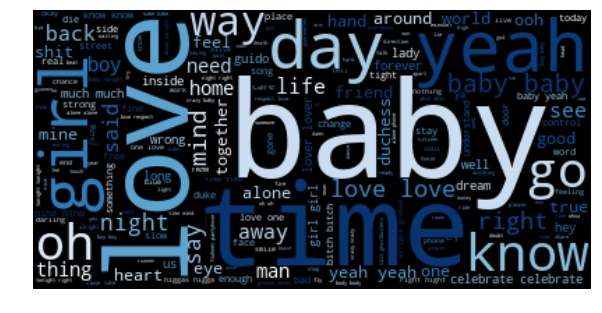

In [318]:
token_1990s_str = " ".join(filter_1990s_token)#the wordcloud module takes in a string hence the need for 

wordcloud = WordCloud(colormap="Blues").generate(token_1990s_str)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

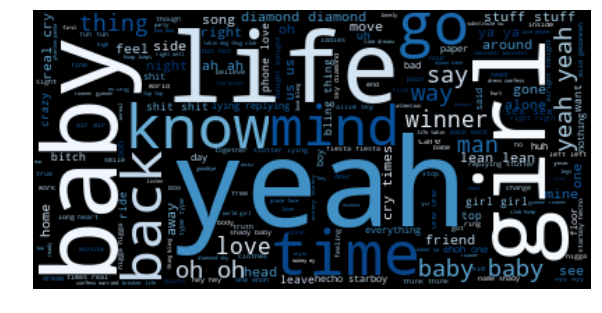

In [319]:
token_2000s_str = " ".join(filter_2000s_token)#the wordcloud module takes in a string hence the need for 

wordcloud = WordCloud(colormap="Blues").generate(token_2000s_str)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

baby	743
love	578
yeah	395
time	302
girl	248
know	239
right	221
night	182
go	160
tonight	160
oh	147
day	145
mind	134
way	133
alone	124
heart	123
life	120
man	117
one	117
away	111


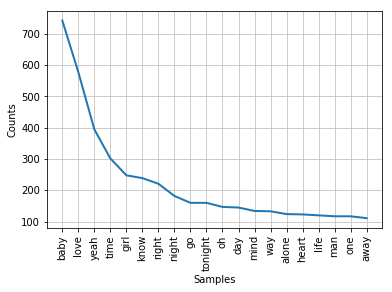

In [320]:
frequency_analysis(filter_1990s_token)

yeah	204
baby	180
oh	114
girl	101
one	96
life	95
love	88
back	82
time	80
ya	80
right	66
name	63
go	62
us	59
shit	57
know	55
thing	51
mind	49
diamond	49
tonight	48


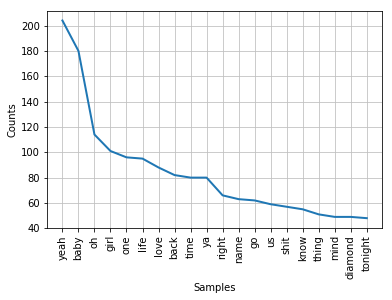

In [321]:
frequency_analysis(filter_2000s_token)

In [70]:
most_comm_1990s = filter_1990s_token_fql.most_common(50)
most_comm_2000s = filter_2000s_token_fql.most_common(50)

In [74]:
common = [tk for tk in most_comm_1990s if tk[0] in most_comm_2000s]  #check the coomon words in tokens for both years

In [75]:
common

[]

In [87]:
# from nltk.stem.wordnet import WordNetLemmatizer
# nltk.download('wordnet')
# lemma = WordNetLemmatizer()

In [86]:
# lemmatized_90s = [lemma.lemmatize(word) for word in filter_1990s_token]

In [83]:
# lemmatized_90s

In [85]:
# filter_1990s_token

In [116]:
# data.plot('artist', type="bar")
# data.groupby('year').sum().plot(y='artist', kind='bar')
# data[data.year >= 2014].groupby([data.artist, 'artist']).count().plot(kind='bar', figsize=(20, 10))
# plt.figure(figsize=(15, 10))

In [322]:
#doc is a Counter representing an fql from a document.
from math import log

def tf(term, doc):
    return doc[term] / sum(doc.values()) #term freq / total terms (relative term freq)

def num_containing(term, corpus):
    return sum(1 for doc in corpus if term in doc) #counts docs in corpus containing term.

#1 added to numerator and denominator is for preventing division by zero. Equivalent of an extra document containing all terms once.
def idf(term, corpus):
    n_t = num_containing(term,corpus)
    return log((len(corpus)+1) / ((n_t) + 1))
    
def tfidf(term, doc, corpus):
    return tf(term, doc) * idf(term, corpus)

In [323]:
corpus_fqls = [song.token_fql for song in music_library]
for song in music_library:
    print(song.artist, song.song, song.year)
    scores = {term: tfidf(term, song.token_fql, corpus_fqls) for term in song.token_fql}
    sorted_terms = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for term, score in sorted_terms[:5]:
        print("\tToken: {}, TF-IDF: {}".format(term, round(score, 5)))
    print("\n")

Michael Jackson Rock With You 1980
	Token: away, TF-IDF: 0.36425
	Token: boogie, TF-IDF: 0.30833
	Token: heat, TF-IDF: 0.29912
	Token: survives, TF-IDF: 0.19737
	Token: love, TF-IDF: 0.12892


Shalamar The Second Time Around 1980
	Token: hard, TF-IDF: 0.40699
	Token: chrome, TF-IDF: 0.29605
	Token: home, TF-IDF: 0.12369
	Token: phone, TF-IDF: 0.10285
	Token: ipod, TF-IDF: 0.09868


Ray, Goodman & Brown Special Lady 1980
	Token: world, TF-IDF: 0.52424
	Token: lady, TF-IDF: 0.51489
	Token: shine, TF-IDF: 0.27513
	Token: behind, TF-IDF: 0.27513
	Token: mind, TF-IDF: 0.1213


The Whispers And The Beat Goes On 1980
	Token: everlasting, TF-IDF: 0.55015
	Token: on, TF-IDF: 0.54226
	Token: new, TF-IDF: 0.24714
	Token: ocean, TF-IDF: 0.16577
	Token: turning, TF-IDF: 0.16577


The Brothers Johnson Stomp 1980
	Token: quit, TF-IDF: 0.50875
	Token: neighbourhood, TF-IDF: 0.45789
	Token: fit, TF-IDF: 0.42545
	Token: party, TF-IDF: 0.29153
	Token: light, TF-IDF: 0.25509


The Isley Brothers Don't Say

	Token: blooded, TF-IDF: 1.75212
	Token: sexy, TF-IDF: 0.58865
	Token: talked, TF-IDF: 0.23362
	Token: describe, TF-IDF: 0.23362
	Token: book, TF-IDF: 0.20532


Chaka Khan Ain't Nobody 1983
	Token: nobody, TF-IDF: 0.40674
	Token: happy, TF-IDF: 0.22434
	Token: better, TF-IDF: 0.16541
	Token: stars, TF-IDF: 0.14956
	Token: forever, TF-IDF: 0.14513


Lionel Richie All Night Long (All Night) 1983
	Token: karamu, TF-IDF: 0.44891
	Token: forever, TF-IDF: 0.3301
	Token: along, TF-IDF: 0.3021
	Token: party, TF-IDF: 0.28582
	Token: jambo, TF-IDF: 0.22445


Debarge Time Will Reveal 1983
	Token: silver, TF-IDF: 0.48347
	Token: rings, TF-IDF: 0.40644
	Token: secure, TF-IDF: 0.24173
	Token: value, TF-IDF: 0.24173
	Token: reveal, TF-IDF: 0.24173


Debarge Time Will Reveal 1984
	Token: silver, TF-IDF: 0.48347
	Token: rings, TF-IDF: 0.40644
	Token: secure, TF-IDF: 0.24173
	Token: value, TF-IDF: 0.24173
	Token: reveal, TF-IDF: 0.24173


Kool & The Gang Joanna 1984
	Token: joanna, TF-IDF: 0.30938
	Toke

Luther Vandross with Gregory Hines There's Nothing Better Than Love 1987
	Token: says, TF-IDF: 0.11491
	Token: draw, TF-IDF: 0.0711
	Token: asks, TF-IDF: 0.0711
	Token: day, TF-IDF: 0.06824
	Token: tired, TF-IDF: 0.06249


Atlantic Starr Always 1987
	Token: always, TF-IDF: 0.70325
	Token: so, TF-IDF: 0.21751
	Token: grand, TF-IDF: 0.15899
	Token: be, TF-IDF: 0.1469
	Token: grow, TF-IDF: 0.12847


Lisa Lisa And Cult Jam Head To Toe 1987
	Token: toe, TF-IDF: 0.72368
	Token: baby, TF-IDF: 0.13085
	Token: nile, TF-IDF: 0.12309
	Token: darling, TF-IDF: 0.1156
	Token: know, TF-IDF: 0.10943


The Whispers Rock Steady 1987
	Token: steady, TF-IDF: 1.22726
	Token: dawn, TF-IDF: 0.40683
	Token: rock, TF-IDF: 0.28528
	Token: long, TF-IDF: 0.25753
	Token: blind, TF-IDF: 0.11213


Herb Alpert Featuring Janet Jackson Diamonds 1987
	Token: diamonds, TF-IDF: 0.59677
	Token: key, TF-IDF: 0.42651
	Token: money, TF-IDF: 0.34429
	Token: free, TF-IDF: 0.33318
	Token: end, TF-IDF: 0.21169


Stephanie Mills I

	Token: that, TF-IDF: 0.07243
	Token: shit, TF-IDF: 0.06361
	Token: j, TF-IDF: 0.05631
	Token: nigga, TF-IDF: 0.05605
	Token: at, TF-IDF: 0.04441


Peabo Bryson Show & Tell 1989
	Token: tell, TF-IDF: 0.70032
	Token: too, TF-IDF: 0.26203
	Token: arrived, TF-IDF: 0.24173
	Token: control, TF-IDF: 0.16029
	Token: stands, TF-IDF: 0.13008


Soul II Soul (Featuring Caron Wheeler) Keep On Movin' 1989
	Token: moving, TF-IDF: 0.96803
	Token: sunrays, TF-IDF: 0.33668
	Token: always, TF-IDF: 0.24821
	Token: stop, TF-IDF: 0.22221
	Token: clock, TF-IDF: 0.18852


Chuckii Booker Turned Away 1989
	Token: believing, TF-IDF: 0.50171
	Token: giving, TF-IDF: 0.43632
	Token: living, TF-IDF: 0.39807
	Token: away, TF-IDF: 0.19931
	Token: oh, TF-IDF: 0.15529


Surface Shower Me With Your Love 1989
	Token: for, TF-IDF: 0.56829
	Token: forever, TF-IDF: 0.3401
	Token: love, TF-IDF: 0.30212
	Token: sky, TF-IDF: 0.21718
	Token: own, TF-IDF: 0.18481


Prince Batdance (From "Batman") 1989
	Token: him, TF-IDF: 0.0694

	Token: over, TF-IDF: 0.14669


Surface The First Time 1991
	Token: regrets, TF-IDF: 0.17155
	Token: eyes, TF-IDF: 0.15663
	Token: cried, TF-IDF: 0.14919
	Token: passed, TF-IDF: 0.14919
	Token: park, TF-IDF: 0.13991


Pebbles Love Makes Things Happen 1991
	Token: know, TF-IDF: 0.40574
	Token: never, TF-IDF: 0.22394
	Token: spell, TF-IDF: 0.16134
	Token: no, TF-IDF: 0.12128
	Token: happen, TF-IDF: 0.1118


En Vogue You Don't Have To Worry 1991
	Token: thang, TF-IDF: 1.23677
	Token: shame, TF-IDF: 0.93461
	Token: wondering, TF-IDF: 0.24735
	Token: dishonesty, TF-IDF: 0.13311
	Token: dismay, TF-IDF: 0.13311


Keith Sweat I'll Give All My Love To You 1991
	Token: running, TF-IDF: 0.22208
	Token: baby, TF-IDF: 0.18065
	Token: will, TF-IDF: 0.16624
	Token: darling, TF-IDF: 0.12574
	Token: you, TF-IDF: 0.10507


C+C Music Factory Gonna Make You Sweat (Everybody Dance Now) 1991
	Token: now, TF-IDF: 0.32752
	Token: control, TF-IDF: 0.21701
	Token: music, TF-IDF: 0.17777
	Token: sweat, TF-IDF: 0

	Token: him, TF-IDF: 0.03554
	Token: king, TF-IDF: 0.02801
	Token: bloom, TF-IDF: 0.02569
	Token: here, TF-IDF: 0.02447
	Token: poulaphouca, TF-IDF: 0.02436


En Vogue Giving Him Something He Can Feel 1992
	Token: feel, TF-IDF: 0.53999
	Token: real, TF-IDF: 0.34569
	Token: uptight, TF-IDF: 0.18463
	Token: seems, TF-IDF: 0.15507
	Token: man, TF-IDF: 0.1363


TLC Baby-Baby-Baby 1992
	Token: factual, TF-IDF: 0.30124
	Token: to, TF-IDF: 0.28343
	Token: sex, TF-IDF: 0.22828
	Token: less, TF-IDF: 0.22208
	Token: sexuality, TF-IDF: 0.15062


Boyz II Men End Of The Road (From "Boomerang") 1992
	Token: mst, TF-IDF: 5.31812


Bobby Brown Humpin' Around 1992
	Token: someone, TF-IDF: 0.32577
	Token: around, TF-IDF: 0.20526
	Token: way, TF-IDF: 0.13703
	Token: clout, TF-IDF: 0.10407
	Token: grovin, TF-IDF: 0.10407


R. Kelly & Public Announcement Slow Dance (Hey Mr. DJ) 1992
	Token: with, TF-IDF: 0.56082
	Token: slow, TF-IDF: 0.17698
	Token: desires, TF-IDF: 0.16116
	Token: grind, TF-IDF: 0.14568
	

	Token: shit, TF-IDF: 0.07764
	Token: bitch, TF-IDF: 0.06886
	Token: uh, TF-IDF: 0.05517
	Token: niggas, TF-IDF: 0.04835
	Token: it, TF-IDF: 0.04111


R. Kelly I Believe I Can Fly (From "Space Jam") 1997
	Token: shit, TF-IDF: 0.07764
	Token: bitch, TF-IDF: 0.06886
	Token: uh, TF-IDF: 0.05517
	Token: niggas, TF-IDF: 0.04835
	Token: it, TF-IDF: 0.04111


En Vogue Don't Let Go (Love) 1997
	Token: pretend, TF-IDF: 0.65554
	Token: shaking, TF-IDF: 0.48347
	Token: friends, TF-IDF: 0.42558
	Token: go, TF-IDF: 0.18609
	Token: control, TF-IDF: 0.16029


Erykah Badu On & On 1997
	Token: stone, TF-IDF: 0.52358
	Token: on, TF-IDF: 0.38572
	Token: names, TF-IDF: 0.27211
	Token: turning, TF-IDF: 0.18141
	Token: same, TF-IDF: 0.17665


Dru Hill In My Bed 1997
	Token: babe, TF-IDF: 0.18949
	Token: head, TF-IDF: 0.15117
	Token: bed, TF-IDF: 0.14915
	Token: place, TF-IDF: 0.13274
	Token: why, TF-IDF: 0.12632


Puff Daddy (Featuring Mase) Can't Nobody Hold Me Down 1997
	Token: under, TF-IDF: 0.21598
	Tok



Lil' Romeo My Baby 2001
	Token: girlfriend, TF-IDF: 0.49868
	Token: swing, TF-IDF: 0.36419
	Token: anyway, TF-IDF: 0.26287
	Token: chance, TF-IDF: 0.19628
	Token: okay, TF-IDF: 0.19143


R. Kelly Featuring Jay-Z Fiesta 2001
	Token: fiesta, TF-IDF: 0.93175
	Token: 'burbs, TF-IDF: 0.26621
	Token: shit, TF-IDF: 0.26101
	Token: ma, TF-IDF: 0.2236
	Token: my, TF-IDF: 0.16402


Usher U Remind Me 2001
	Token: knew, TF-IDF: 0.62835
	Token: through, TF-IDF: 0.33661
	Token: you, TF-IDF: 0.15714
	Token: fooled, TF-IDF: 0.11681
	Token: creep, TF-IDF: 0.10266


Mariah Carey Featuring Da Brat & Ludacris Loverboy 2001
	Token: loverboy, TF-IDF: 0.26315
	Token: a, TF-IDF: 0.12357
	Token: scream, TF-IDF: 0.11564
	Token: out, TF-IDF: 0.08813
	Token: lover, TF-IDF: 0.07752


Alicia Keys Fallin' 2001
	Token: used, TF-IDF: 0.22892
	Token: pleasure, TF-IDF: 0.20654
	Token: falling, TF-IDF: 0.20093
	Token: confused, TF-IDF: 0.19137
	Token: out, TF-IDF: 0.18256


Ginuwine Differences 2001
	Token: competes, T


Alicia Keys Like You'll Never See Me Again 2008
	Token: gift, TF-IDF: 0.22894
	Token: for, TF-IDF: 0.21433
	Token: granted, TF-IDF: 0.21272
	Token: again, TF-IDF: 0.21127
	Token: guaranteed, TF-IDF: 0.19229


Keyshia Cole I Remember 2008
	Token: lonely, TF-IDF: 0.34126
	Token: remember, TF-IDF: 0.24372
	Token: out, TF-IDF: 0.18551
	Token: genuinely, TF-IDF: 0.18463
	Token: broke, TF-IDF: 0.17155


Usher Featuring Young Jeezy Love In This Club 2008
	Token: watching, TF-IDF: 0.21023
	Token: floor, TF-IDF: 0.14915
	Token: side, TF-IDF: 0.12514
	Token: ryan, TF-IDF: 0.12087
	Token: emotionally, TF-IDF: 0.12087


Lil Wayne Featuring Static Major Lollipop 2008
	Token: lollipop, TF-IDF: 0.58756
	Token: hump, TF-IDF: 0.50876
	Token: lumps, TF-IDF: 0.50876
	Token: thug, TF-IDF: 0.42732
	Token: club, TF-IDF: 0.37507


Keyshia Cole Heaven Sent 2008
	Token: heaven, TF-IDF: 0.36558
	Token: been, TF-IDF: 0.36558
	Token: say, TF-IDF: 0.24734
	Token: change, TF-IDF: 0.20135
	Token: door, TF-IDF: 0.18

	Token: arbeiten, TF-IDF: 0.54223
	Token: muss, TF-IDF: 0.30124
	Token: mich, TF-IDF: 0.24099
	Token: mache, TF-IDF: 0.24099
	Token: mehr, TF-IDF: 0.24099


Drake Summer Sixteen 2016
	Token: sixteen, TF-IDF: 0.3754
	Token: revenge, TF-IDF: 0.31283
	Token: looking, TF-IDF: 0.26299
	Token: seasons, TF-IDF: 0.1877
	Token: clean, TF-IDF: 0.16323


Desiigner Panda 2016
	Token: panda, TF-IDF: 0.69989
	Token: phantom, TF-IDF: 0.43743
	Token: atlanta, TF-IDF: 0.24885
	Token: scammers, TF-IDF: 0.24885
	Token: panty, TF-IDF: 0.24885


Drake Featuring WizKid & Kyla One Dance 2016
	Token: where, TF-IDF: 0.30488
	Token: dance, TF-IDF: 0.29829
	Token: hand, TF-IDF: 0.27116
	Token: go, TF-IDF: 0.17369
	Token: style, TF-IDF: 0.13548


Rihanna Needed Me 2016
	Token: carriage, TF-IDF: 0.26621
	Token: imagine, TF-IDF: 0.24735
	Token: twisted, TF-IDF: 0.2236
	Token: savage, TF-IDF: 0.2236
	Token: confess, TF-IDF: 0.21512


D.R.A.M. Featuring Lil Yachty Broccoli 2016
	Token: ohhhh, TF-IDF: 0.3732
	Token: s

The tf-idf scheme reduces documents of arbitrary length to fixed-length lists of
numbers. While the tf-idf reduction has some appealing features—notably in its basic identification of sets
of words that are discriminative for documents in the collection—the approach also provides a relatively small amount of reduction in description length and reveals little in the way of inter- or intradocument statistical structure.

This line of thinking leads to the latent Dirichlet allocation (LDA) model that we present in the
current paper.
It is important to emphasize that an assumption of exchangeability is not equivalent to an assumption that the random variables are independent and identically distributed. Rather, exchangeability essentially can be interpreted as meaning “conditionally independent and identically distributed,” where the conditioning is with respect to an underlying latent parameter of a probability
distribution. Conditionally, the joint distribution of the random variables is simple and factored
while marginally over the latent parameter, the joint distribution can be quite complex. Thus, while
an assumption of exchangeability is clearly a major simplifying assumption in the domain of text
modeling, and its principal justification is that it leads to methods that are computationally efficient,
the exchangeability assumptions do not necessarily lead to methods that are restricted to simple
frequency counts or linear operations.

Paper: http://www.cs.columbia.edu/~blei/papers/BleiNgJordan2003.pdf

In [324]:
len(filter_1990s_token_fql)

5285

In [325]:
len(filter_2000s_token_fql)

2775

In [326]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [327]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
no_features = 1000
no_topics = 3
no_top_words = 5

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features)
tf = tf_vectorizer.fit_transform(filter_1990s_token)
tf_feature_names = tf_vectorizer.get_feature_names()


# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, tf_feature_names, no_top_words)

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
love yeah go oh shit
Topic 1:
night say life away man
Topic 2:
baby time know girl right


In [328]:
tf = tf_vectorizer.fit_transform(filter_2000s_token)
tf_feature_names = tf_vectorizer.get_feature_names()


# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, tf_feature_names, no_top_words)

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
baby ya life thing like
Topic 1:
girl time go money ah
Topic 2:
yeah oh one love back


### Feature Extraction

In [223]:
transformer = TfidfTransformer()
transformer.fit_transform(counts).toarray()

260


In [268]:
# vectorizer = CountVectorizer(analyzer="word")
# song1 = vectorizer.fit_transform(music_library[1].token)

# # Latent Dirichlet Allocation Model
# lda = LatentDirichletAllocation(n_components=5, max_iter=10, learning_method='online',verbose=True)
# data_lda = lda.fit_transform(song1)

In [267]:
# def selected_topics(model, vectorizer, top_n=10):
#     for idx, topic in enumerate(model.components_):
#         print("Topic %d:" % (idx))
#         print([(vectorizer.get_feature_names()[i], topic[i])for i in topic.argsort()[:-top_n - 1:-1]]) 

In [266]:
# selected_topics(lda, vectorizer)

In [329]:
vect = TfidfVectorizer(stop_words=nltk_stopwords, max_features=1000)
lyrics = [song.lyrics for song in music_library if song.year < 2000]
vect_text = vect.fit_transform(lyrics)

print(vect_text.shape)
print(vect_text)

(410, 1000)
  (0, 292)	0.13851537460964178
  (0, 573)	0.10746905029456037
  (0, 575)	0.1355557509524082
  (0, 410)	0.42519824452861354
  (0, 98)	0.43811933532215896
  (0, 543)	0.26386221539260346
  (0, 47)	0.6163068609763119
  (0, 321)	0.18665482599021754
  (0, 939)	0.15924838423098425
  (0, 196)	0.1779525384374792
  (0, 811)	0.15760462114084076
  (0, 361)	0.10946516976026502
  (1, 122)	0.13331020808557348
  (1, 392)	0.14775001998691425
  (1, 199)	0.14775001998691425
  (1, 137)	0.11233742363226214
  (1, 431)	0.28236900117163355
  (1, 667)	0.2148177453589019
  (1, 401)	0.8401703505766692
  (1, 266)	0.152903811933088
  (1, 626)	0.152903811933088
  (1, 95)	0.12379894713704388
  (1, 563)	0.1433925509845584
  (1, 795)	0.10740887267945096
  (2, 573)	0.15782583602139175
  :	:
  (408, 534)	0.16242132869611645
  (408, 893)	0.10685408927474571
  (408, 777)	0.1506187911353404
  (408, 264)	0.21619188333471842
  (408, 917)	0.16828026152711223
  (408, 503)	0.22676416261697074
  (408, 994)	0.22676416

In [330]:
idf=vect.idf_

dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])

baby williams


In [332]:
# print(dd['yeah'])
# print(dd['zoe'])

In [337]:
vect2 = TfidfVectorizer(stop_words=nltk_stopwords, max_features=1000)
lyrics2 = [song.lyrics for song in music_library if song.year > 1999]
vect_text2 = vect2.fit_transform(lyrics2)

print(vect_text2.shape)
print(vect_text2)

(201, 1000)
  (0, 904)	0.08135444150161143
  (0, 537)	0.1219631588741525
  (0, 96)	0.11000422842283684
  (0, 91)	0.687198598630986
  (0, 876)	0.10212708231006659
  (0, 793)	0.11000422842283684
  (0, 836)	0.1219631588741525
  (0, 914)	0.07875053994929634
  (0, 438)	0.11000422842283684
  (0, 325)	0.10573590139295916
  (0, 929)	0.35803457564706326
  (0, 387)	0.2629109919803949
  (0, 919)	0.2629109919803949
  (0, 699)	0.1219631588741525
  (0, 165)	0.10573590139295916
  (0, 681)	0.06728973433036492
  (0, 863)	0.11522823850900411
  (0, 561)	0.07754971346045016
  (0, 353)	0.18309133171436384
  (0, 971)	0.08277372354661743
  (0, 871)	0.1219631588741525
  (0, 678)	0.08589982482887325
  (0, 334)	0.11000422842283684
  (0, 274)	0.11000422842283684
  (0, 993)	0.09624356427691423
  :	:
  (199, 981)	0.19110523009555205
  (199, 891)	0.43603604695507947
  (200, 904)	0.08524066367433791
  (200, 984)	0.6391020271141664
  (200, 49)	0.06247779430533592
  (200, 205)	0.09378438436551466
  (200, 484)	0.141008

In [338]:
idf2=vect2.idf_

dd2=dict(zip(vect2.get_feature_names(), idf2))
l=sorted(dd2, key=(dd2).get)
# print(l)
print(l[0],l[-1])

yeah yeh


In [339]:
# print(dd['yeah'])
# print(dd['yeh'])

In [340]:
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(vect_text)
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(201, 10)
[[0.02036152 0.02036082 0.81675003 ... 0.020361   0.020361   0.02036126]
 [0.72906277 0.03010231 0.03010367 ... 0.03010499 0.03010635 0.03010523]
 [0.78741472 0.02362048 0.02361992 ... 0.0236211  0.02362079 0.02362179]
 ...
 [0.01857185 0.01857142 0.0185718  ... 0.01857217 0.01857203 0.01857186]
 [0.01812668 0.0181258  0.01812567 ... 0.83686635 0.01812629 0.01812574]
 [0.02071066 0.02071045 0.02071044 ... 0.81360496 0.02071094 0.02071022]]


In [341]:
total=0
for i in lda_top[2]:
    total=total+i
print(total) 

1.0


In [342]:
print("Song 0: ")
for i,topic in enumerate(lda_top[0]):
    print("Topic ",i,": ",topic*100,"%")

Song 0: 
Topic  0 :  2.036151987457895 %
Topic  1 :  2.036081983707278 %
Topic  2 :  81.67500320964713 %
Topic  3 :  2.036074097525755 %
Topic  4 :  2.0361110168804064 %
Topic  5 :  2.036128474193984 %
Topic  6 :  2.036122837207291 %
Topic  7 :  2.0361002625427114 %
Topic  8 :  2.0361003947140386 %
Topic  9 :  2.0361257361235365 %


In [343]:
print(lda_model.components_)
print(lda_model.components_.shape)

[[0.94908777 0.69201291 0.68567569 ... 0.78205939 0.64105278 0.76706749]
 [0.76865513 0.73533287 0.53611519 ... 0.69883209 0.72470563 0.88384159]
 [0.58546564 0.69906707 0.74502903 ... 0.9360808  0.65822547 0.68395256]
 ...
 [0.64149247 0.77451123 0.72104421 ... 0.74272633 0.57520215 0.68831887]
 [0.79051369 0.64592611 0.68273834 ... 0.81103644 0.85259693 0.6872459 ]
 [0.638548   0.64803891 0.79071705 ... 0.73539761 0.59335827 0.6157007 ]]
(10, 1000)


In [344]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
tonight top ayy finesse baby though bye friends morning stop 

Topic 1: 
pride us vorfahren pain friends fast rockstar floating lamar winner 

Topic 2: 
boy like one man fiesta shit toast ovo pink stuff 

Topic 3: 
ah starboy crazy hecho arbeiten somebody ya baby yadadadadadadada know 

Topic 4: 
money decline time name ohhhh mind sorry rasta room party 

Topic 5: 
thing phone bling ayy butt else gedanken knew love wild 

Topic 6: 
type nigga chardonnay kid inspired stuff montana drugs bar lisa 

Topic 7: 
yeah baby uh girl hey back nothing air said five 

Topic 8: 
baby oh time one mine go things see diamond ehoh 

Topic 9: 
alive diamond oh life even like reason drinking niggas slowly 



In [345]:
def draw_word_cloud(index):
    imp_words_topic=""
    comp=lda_model.components_[index]
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
    for word in sorted_words:
        imp_words_topic=imp_words_topic+" "+word[0]

    wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
    plt.figure( figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

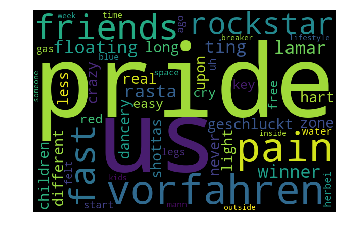

In [347]:
draw_word_cloud(1)

In [349]:
existing_data = pd.read_csv('billboard_lyrics_1964-2015.csv')
existing_data

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1.0
6,7,help,the beatles,1965,help i need somebody help not just anybody hel...,3.0
7,8,cant you hear my heart beat,hermans hermits,1965,carterlewis every time i see you lookin my way...,5.0
8,9,crying in the chapel,elvis presley,1965,you saw me crying in the chapel the tears i s...,1.0
9,10,my girl,the temptations,1965,ive got sunshine on a cloudy day when its cold...,3.0


In [350]:
len(existing_data)

5100

In [351]:
existing_data.columns

Index(['Rank', 'Song', 'Artist', 'Year', 'Lyrics', 'Source'], dtype='object')

In [364]:
new = pd.DataFrame()

for index, row in existing_data.iterrows():
    for index2, row2 in data.iterrows():
        if index <= len(data):
#             print(existing_data.loc[index, 'Song'])
#             print(data.loc[index2, 'song'])
#             print("\n")
            if existing_data.loc[index, 'Song'] == data.loc[index2, 'song']:
                print("here")
#                 print(existing_data.loc[index, 'Song'])
#                 print(data.loc[index2, 'song'])
                new.add(row)

KeyboardInterrupt: 

In [ ]:
new

In [367]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, lda_top, vect)
panel

AttributeError: 'numpy.ndarray' object has no attribute 'getA1'

In [368]:
pyLDAvis.sklearn.prepare(lda_model, lda_top, vect)

AttributeError: 'numpy.ndarray' object has no attribute 'getA1'